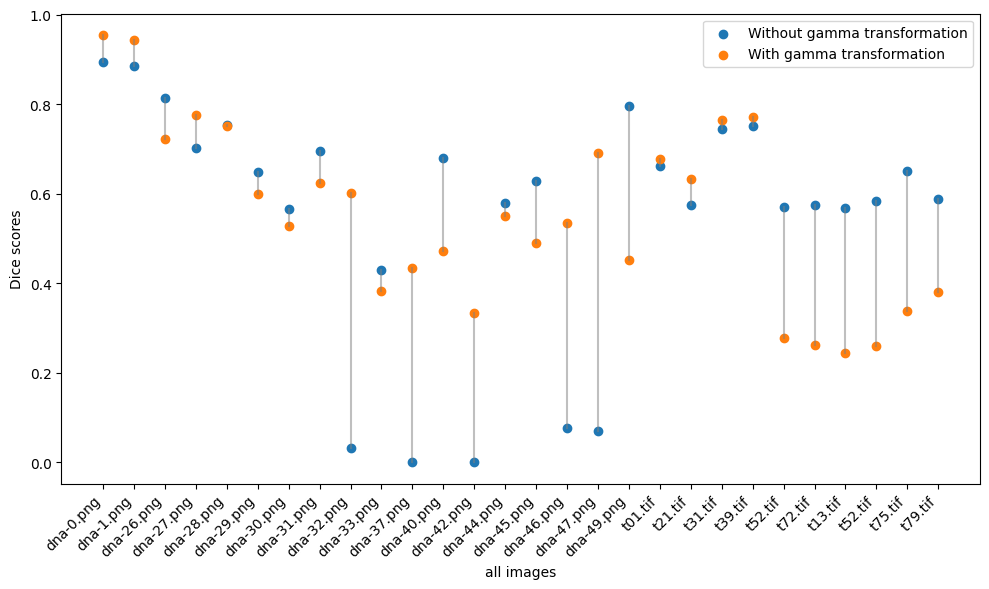

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------
#PLOT FOR GAMMA TRANSFORMATION
#-----------------------------

# Dataset NIH3T3 as an example
labels = [
    'dna-0.png',  'dna-1.png',  'dna-26.png', 'dna-27.png',
    'dna-28.png', 'dna-29.png', 'dna-30.png', 'dna-31.png',
    'dna-32.png', 'dna-33.png', 'dna-37.png', 'dna-40.png',
    'dna-42.png', 'dna-44.png', 'dna-45.png', 'dna-46.png',
    'dna-47.png', 'dna-49.png', 't01.tif', 't21.tif', 't31.tif', 't39.tif', 't52.tif', 't72.tif',
    't13.tif', 't52.tif', 't75.tif', 't79.tif'
]

# Define indices for the labels of the later x-axis 
file_names = np.arange(len(labels))

# Load the Dice scores from Otsu-only into one array, and those from gamma-transformation into another
# Loading
NIH3T3_otsu = np.load('Dice_score_vectors/otsu_only/NIH3T3_otsu_dice_scores.npy')
NIH3T3_gamma = np.load('Dice_score_vectors/gamma/NIH3T3_gamma_dice_scores.npy')
N2DL_HeLa_otsu = np.load('Dice_score_vectors/otsu_only/N2DL-HeLa_otsu_dice_scores.npy')
N2DL_HeLa_gamma = np.load('Dice_score_vectors/gamma/N2DL-HeLa_gamma_dice_scores.npy')
N2DH_GOWT1_otsu = np.load('Dice_score_vectors/otsu_only/N2DH-GOWT1_otsu_dice_scores.npy')
N2DH_GOWT1_gamma = np.load('Dice_score_vectors/gamma/N2DH-GOWT1_gamma_dice_scores.npy')
# Combining
all_dice_scores_otsu = np.concatenate((NIH3T3_otsu, N2DL_HeLa_otsu, N2DH_GOWT1_otsu))
all_dice_scores_gamma = np.concatenate((NIH3T3_gamma, N2DL_HeLa_gamma, N2DH_GOWT1_gamma))

# Save combined vectors for potential usage outside of this code
np.save('Dice_score_vectors/otsu_only/all_dice_scores_otsu', all_dice_scores_otsu)
np.save('Dice_score_vectors/gamma/all_dice_scores_gamma', all_dice_scores_gamma)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without gamma transformation')
plt.scatter(file_names, all_dice_scores_gamma, color='C1', label='With gamma transformation')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_gamma):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('')
plt.tight_layout()
plt.show()

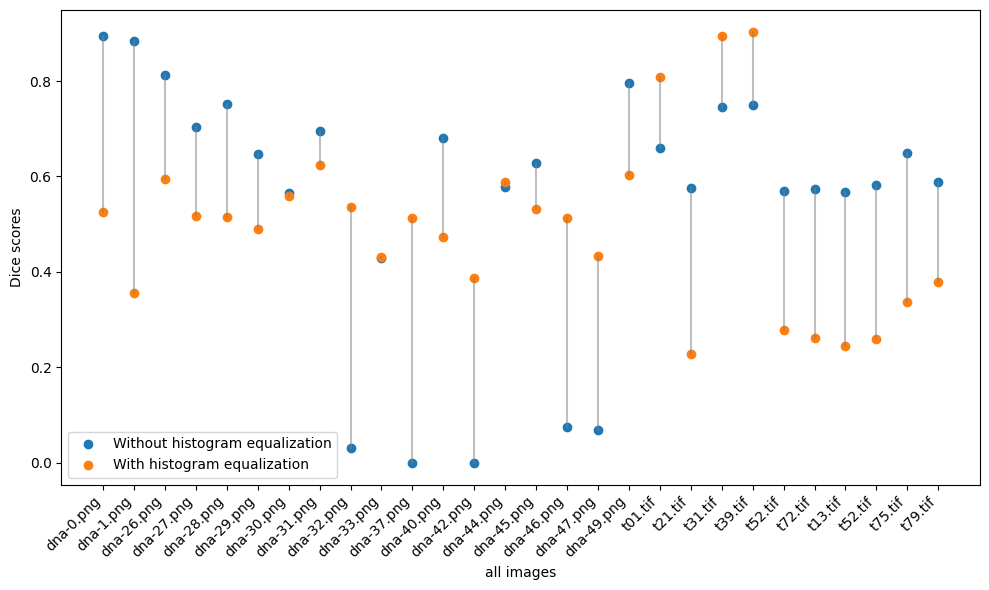

In [3]:


#-------------------------------
#PLOT FOR HISTOGRAM EQUALIZATION
#-------------------------------



# Load and combine all dice scores of histogram equalization in one 1D-array
# Load and combine for histogram equalization (eq)
NIH3T3_eq = np.load('Dice_score_vectors/histogram_equalization/NIH3T3_eq_dice_scores.npy')
N2DL_HeLa_eq = np.load('Dice_score_vectors/histogram_equalization/N2DL-HeLa_eq_dice_scores.npy')
N2DH_GOWT1_eq = np.load('Dice_score_vectors/histogram_equalization/N2DH-GOWT1_eq_dice_scores.npy')
all_dice_scores_eq = np.concatenate((NIH3T3_eq, N2DL_HeLa_eq, N2DH_GOWT1_eq))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/histogram_equalization/all_dice_scores_histeq', all_dice_scores_eq)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without histogram equalization')
plt.scatter(file_names, all_dice_scores_eq, color='C1', label='With histogram equalization')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_eq):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('')
plt.tight_layout()
plt.show()

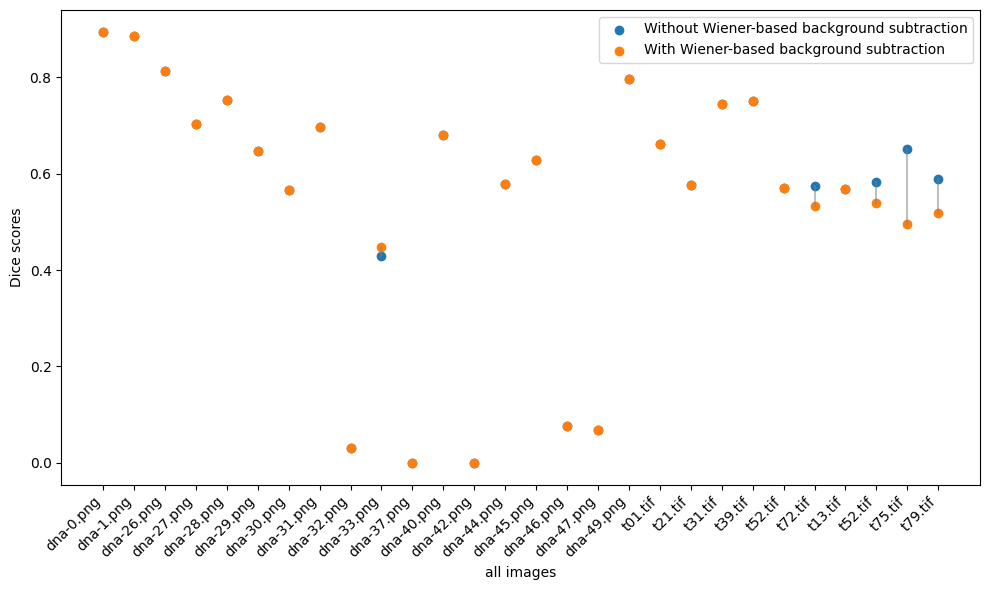

In [ ]:

#---------------------
#PLOT FOR WIENERFILTER
#---------------------


# Load and combine all dice scores of wienerfilter in one 1D-array
# Load and combine for wienerfilter
NIH3T3_wf = np.load('Dice_score_vectors/wienerfilter/NIH3T3_wiener_dice_scores.npy')
N2DL_HeLa_wf = np.load('Dice_score_vectors/wienerfilter/N2DL-HeLa_wiener_dice_scores.npy')
N2DH_GOWT1_wf = np.load('Dice_score_vectors/wienerfilter/N2DH-GOWT1_wiener_dice_scores.npy')
all_dice_scores_wf = np.concatenate((NIH3T3_wf, N2DL_HeLa_wf, N2DH_GOWT1_wf))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/wienerfilter/all_dice_scores_wienerfilter', all_dice_scores_wf)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without Wiener-based background subtraction')
plt.scatter(file_names, all_dice_scores_wf, color='C1', label='With Wiener-based background subtraction')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_wf):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('')
plt.tight_layout()
plt.show()

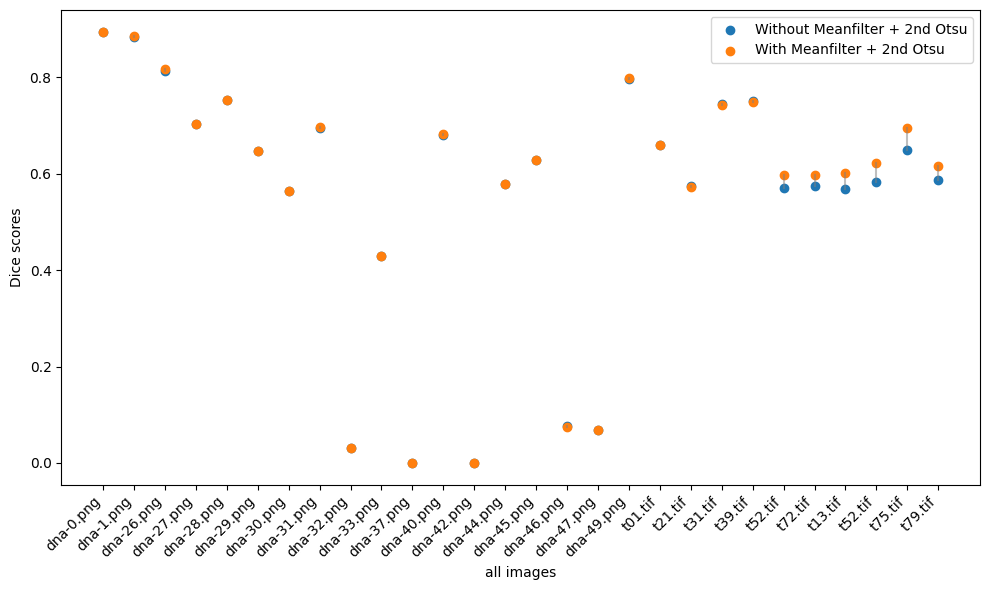

In [6]:

#-------------------------------
#PLOT FOR MEANFILTER + 2nd OTSU
#-------------------------------


# Load and combine all dice scores of mean filter + 2nd Otsu in one 1D-array
# Load and combine for Meanfilter + 2nd Otsu
NIH3T3_mean2 = np.load('Dice_score_vectors/Meanfilt_2nd_Otsu/NIH3T3_meanfilt_2nd_Otsu_dice_scores.npy')
N2DL_HeLa_mean2 = np.load('Dice_score_vectors/Meanfilt_2nd_Otsu/N2DL-HeLa_meanfilt_2nd_Otsu_dice_scores.npy')
N2DH_GOWT1_mean2 = np.load('Dice_score_vectors/Meanfilt_2nd_Otsu/N2DH-GOWT1_meanfilt_2nd_Otsu_dice_scores.npy')
all_dice_scores_mean2 = np.concatenate((NIH3T3_mean2, N2DL_HeLa_mean2, N2DH_GOWT1_mean2))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/Meanfilt_2nd_Otsu/all_dice_scores_meanfilt_2nd_Otsu', all_dice_scores_mean2)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without Meanfilter + 2nd Otsu')
plt.scatter(file_names, all_dice_scores_mean2, color='C1', label='With Meanfilter + 2nd Otsu')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_mean2):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('')
plt.tight_layout()
plt.show()

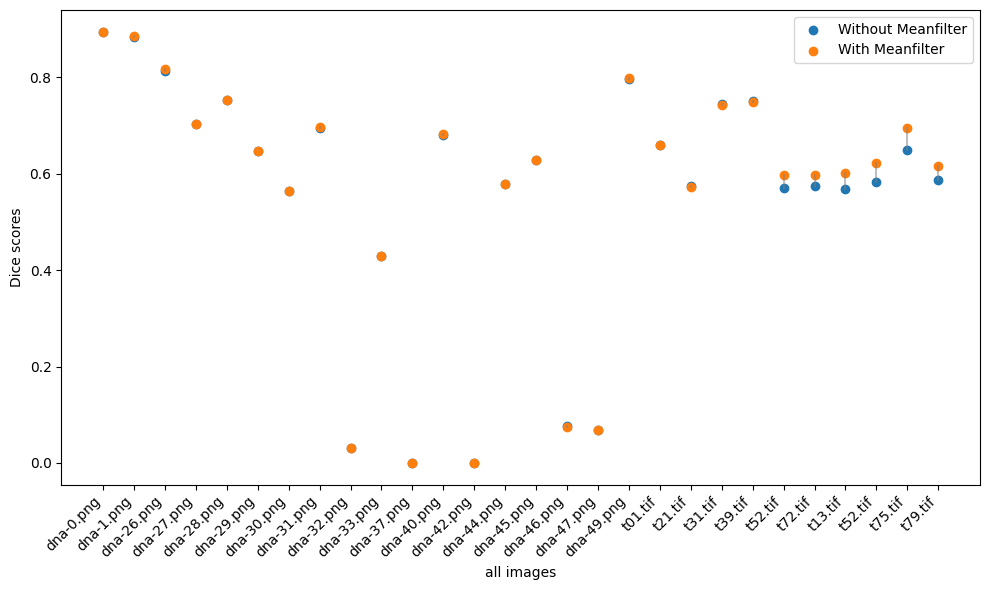

In [7]:

#-------------------
#PLOT FOR MEANFILTER
#-------------------


# Load and combine all dice scores of meanfilter  in one 1D-array
# Load and combine for meanfilter
NIH3T3_mean = np.load('Dice_score_vectors/Meanfilter/NIH3T3_Meanfilter_dice_scores.npy')
N2DL_HeLa_mean = np.load('Dice_score_vectors/Meanfilter/N2DL-HeLa_Meanfilter_dice_scores.npy')
N2DH_GOWT1_mean = np.load('Dice_score_vectors/Meanfilter/N2DH-GOWT1_Meanfilter_dice_scores.npy')
all_dice_scores_mean = np.concatenate((NIH3T3_mean, N2DL_HeLa_mean, N2DH_GOWT1_mean))

# Save combined vector of histogram equalization for potential usage outside of this code
np.save('Dice_score_vectors/Meanfilter/all_dice_scores_Meanfilter_Otsu', all_dice_scores_mean)


# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(file_names, all_dice_scores_otsu, color='C0', label='Without Meanfilter')
plt.scatter(file_names, all_dice_scores_mean2, color='C1', label='With Meanfilter')

# Draw connecting line between corresponding datapoints of different methods
for xi, yi1, yi2 in zip(file_names, all_dice_scores_otsu, all_dice_scores_mean2):
    plt.plot([xi, xi], [yi1, yi2], color='gray', alpha=0.5)

# Labels for file names
plt.xticks(file_names, labels, rotation=45, ha='right')

plt.legend()
plt.xlabel('all images')
plt.ylabel('Dice scores')
plt.title('')
plt.tight_layout()
plt.show()